In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('../Data/ttc_subway_delay_2018_2019_4ML_filtered.csv')
df.head()

FileNotFoundError: [Errno 2] File b'../Data/ttc_subway_delay_2018_2019_4ML_filtered.csv' does not exist: b'../Data/ttc_subway_delay_2018_2019_4ML_filtered.csv'

In [ ]:
df.columns

In [ ]:
#df_selected = df[["station","bound","line","month_number","hour","year","day_number"]]
df_selected = df[["station","bound","day","hour"]]
#df_selected = df[["station","bound","month_number","hour","year","day_number"]]
#df_selected = df[["station","month_number","hour"]]
df_selected.head()

RFE

In [3]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X_NoEncoded = df_selected
X = pd.get_dummies(X_NoEncoded)
y = df["min_delay"]

NameError: name 'df_selected' is not defined

In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X, y)
selector.support_

In [29]:
selector.ranking_

array([115,  84,  79,  71,  12,  28,  11,  14,  83,  85,   1,  62, 106,
        75,  87,  55, 118,  21,  67,   2,  25,  42,  31,  76, 102,  65,
        36,  82,  37,  24,  13,  81,  64,  10,  52,  41,  72, 113,  74,
       110,  59,   9,  16,   3,  99,  20, 121,  88,  19, 101,  54, 109,
        66,   8, 120,  56,  95,  70,   7, 112,  46,  94,  89,  92,   6,
        97, 119, 111,   1,   5,   1,  68,  58, 107,   4, 105,  44,  26,
        39,  33,  15,  29,  27,  96, 104,  77,  80,  98, 100,  17,  93,
        30, 103, 122, 117,  22,  86,  78,  63,  18,  38,  53,  73,  61,
        23,  60,  57,  32, 116,  40,  34,  35, 108,  90, 114,  69,  91,
        47,  50,  45,  43,  49,  48,  51])

In [39]:
X.iloc[:,63]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
13533    0
13534    0
13535    0
13536    0
13537    0
13538    0
13539    0
13540    0
13541    0
13542    0
13543    0
13544    0
13545    0
13546    0
13547    0
13548    0
13549    0
13550    0
13551    0
13552    0
13553    0
13554    0
13555    0
13556    0
13557    0
13558    0
13559    0
13560    0
13561    0
13562    0
Name: station_QUEEN'S PARK STATION, Length: 13563, dtype: uint8

In [ ]:
selector.support_array([ True,  True,  True,  True,  True, False, False, False, False, False])
>>>ctor.ranking_array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [ ]:
df_selected = df[["station","bound","line","month_number","hour","year","day_number"]]
#df_selected = df[["station","bound","month_number","hour","year","day_number"]]
#df_selected = df[["station","bound","month_number","hour","year","day_number"]]
#df_selected = df[["station","month_number","hour"]]
df_selected.head()

Label Encoder

In [5]:
# Assign the data to X and y

X_NoEncoded = df_selected
y = df["min_delay"].values.reshape(-1, 1)
print(X_NoEncoded.shape, y.shape)

(13563, 4) (13563, 1)


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data = X_NoEncoded.copy()

#label_encoder.fit(data["station","bound","day"])
label_encoder.fit(data["station"])
label_encoder.classes_


array(['BATHURST STATION', 'BATHUSRT STATION', 'BAY STATION',
       'BAYVIEW STATION', 'BESSARION STATION', 'BLOOR DANFORTH SUBWAY',
       'BLOOR SATION', 'BLOOR STATION', 'BROADVIEW STATION',
       'BROADVIEW TO YONGE', 'CASTLE FRANK STATION', 'CHESTER STATION',
       'CHRISTIE STATION', 'COLLEGE STATION', 'COXWELL STATION',
       'DAVISVILLE BUILD UP', 'DAVISVILLE BUILD-UP', 'DAVISVILLE STATION',
       'DAVISVILLE YARD', 'DON MILLS STATION', 'DONLANDS STATION',
       'DOWNSVIEW PARK STATION', 'DUFFERIN STATION', 'DUNDAS STATION',
       'DUNDAS WEST STATION', 'DUPONT STATION', 'EGLINTON STATION',
       'EGLINTON WEST STATION', 'ELLESMERE STATION', 'FINCH STATION',
       'FINCH WEST STATION', 'GLENCAIRN STATION', 'GREENWOOD PORTAL',
       'GREENWOOD STATION', 'GREENWOOD YARD', 'HIGH PARK STATION',
       'HIGHWAY 407 STATION', 'ISLINGTON STATION', 'JANE STATION',
       'KEELE STATION', 'KEELE YARD', 'KENNEDY BD STATION',
       'KENNEDY SRT STATION', 'KING STATION', 'KIPLIN

In [7]:
station_encoded = label_encoder.transform(data.station)
station_encoded

array([ 8, 14, 14, ..., 61, 86, 87])

In [8]:
print(data.shape)

(13563, 4)


In [9]:
data.head()

,station,bound,day,hour
0,BROADVIEW STATION,W,Tuesday,6
1,COXWELL STATION,W,Wednesday,11
2,COXWELL STATION,E,Tuesday,17
3,COXWELL STATION,E,Tuesday,17
4,COXWELL STATION,W,Tuesday,17


In [10]:
data["station_encoded"] = station_encoded
data.head()

,station,bound,day,hour,station_encoded
0,BROADVIEW STATION,W,Tuesday,6,8
1,COXWELL STATION,W,Wednesday,11,14
2,COXWELL STATION,E,Tuesday,17,14
3,COXWELL STATION,E,Tuesday,17,14
4,COXWELL STATION,W,Tuesday,17,14


In [11]:
data = data[["station_encoded","bound","day","hour"]]
data.head()

,station_encoded,bound,day,hour
0,8,W,Tuesday,6
1,14,W,Wednesday,11
2,14,E,Tuesday,17
3,14,E,Tuesday,17
4,14,W,Tuesday,17


get_dummies

In [12]:
data_bound_encoded = pd.get_dummies(data, columns=["bound"])
data_bound_encoded.head()

,station_encoded,day,hour,bound_B,bound_E,bound_N,bound_S,bound_W
0,8,Tuesday,6,0,0,0,0,1
1,14,Wednesday,11,0,0,0,0,1
2,14,Tuesday,17,0,1,0,0,0
3,14,Tuesday,17,0,1,0,0,0
4,14,Tuesday,17,0,0,0,0,1


In [13]:
data_encoded = pd.get_dummies(data_bound_encoded, columns=["day"])
data_encoded.head()

,station_encoded,hour,bound_B,bound_E,bound_N,bound_S,bound_W,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,6,0,0,0,0,1,0,0,0,0,0,1,0
1,14,11,0,0,0,0,1,0,0,0,0,0,0,1
2,14,17,0,1,0,0,0,0,0,0,0,0,1,0
3,14,17,0,1,0,0,0,0,0,0,0,0,1,0
4,14,17,0,0,0,0,1,0,0,0,0,0,1,0


GET DUMMIES ALL

In [ ]:
X = pd.get_dummies(X_NoEncoded)
X.head()

In [14]:
X = data_encoded
print(X.shape, y.shape)

(13563, 14) (13563, 1)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, y_train.shape)

(10172, 14) (10172, 1)


DONT RUN THIS FOR df_selected = df[["station","bound","day","hour"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_NoEncoded, y, random_state=42)

print(X_train.shape, y_train.shape)

In [ ]:
X_train.head()

StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [19]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [20]:
#--> FOR SCALED!!

# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.008239931658879263
Testing Score: -1.5681662630047677e+18


In [21]:
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.008239931658879263
Testing Score: -1.5681662630047677e+18


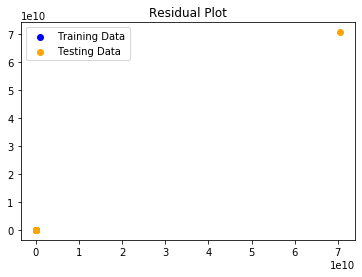

In [22]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

FOR NOT SCALED

In [16]:
#--> FOR NOT SCALED

# Fit the model to the training data and calculate the scores for the training and testing data
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION
### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.008471450511339795
Testing Score: 0.008790523557354324


Text(0.5, 1.0, 'Residual Plot')

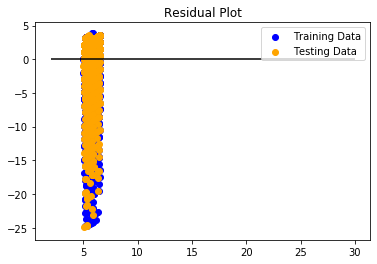

In [17]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [ ]:
# Make predictions with the model
predictions = model.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})